# Determine monthly NEED expenses

This will be the input value to determine the exact amount for an emergency fund. 

Observe the specfic NEED expenditures from the a specific period of time. Create a box plot or another visualization to estimate upper and lower values. 

Calcuate these values excluding rent. 

Finally, propose a table for 3,4,5 and 6 months of expenses for each lower, medium and upper boundaries of NEED expenditure. 

In [20]:
import os
import numpy as np
from personal_finances_utilities import plot_expenses_vs_income, load_money_manager_file, classify_expenses

In [2]:
# Load the Excel file
folder_path = 'D:/OneDrive/Documentos/PERSONAL FINANCES/money_manager_files'
file_name = '2025-02-11.xlsx'
file_path = os.path.join(folder_path, file_name)

target_year = 2024

In [5]:
expenses_df, income_df = load_money_manager_file(file_path)

In [10]:
expenses_df = classify_expenses(expenses_df)
expenses_df

,Date,Account,Category,Subcategory,Note,EUR,Income/Expense,Description,Amount,Currency,Konten.1,Month,column_name,Type
0,2025-02-11 22:40:24,DNB,Bestand ändern,NaN,Differenz,0.20,Ausg.,NaN,2.36,NOK,2.36,2025-02,Type,UNKNOWN
1,2025-02-11 22:23:57,Gebyrfri Visa Gold,Transfer family,NaN,Send money home,326.39,Ausg.,NaN,3805.40,NOK,3805.40,2025-02,Type,WANT
2,2025-02-11 20:44:06,DNB,Miete,Kaution Deposit,Folke Bernadottesvei,1801.17,Ausg.,NaN,21000.00,NOK,21000.00,2025-02,Type,NEED
3,2025-02-11 20:43:25,DNB,Food,Lunch,Almuerzo Equinor,3.95,Ausg.,NaN,46.00,NOK,46.00,2025-02,Type,NEED
4,2025-02-11 20:42:26,DNB,Food,Groceries,Compras varias Kiwi,52.18,Ausg.,NaN,608.40,NOK,608.40,2025-02,Type,NEED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351,2019-12-19 09:40:46,Sparkasse,Haircut,NaN,Corte de cabello,20.50,Ausg.,NaN,20.50,EUR,20.50,2019-12,Type,NEED
3352,2019-12-16 10:34:10,Cash,Travel,Taxi fares,Pagué a Michael en casa viaje Neudstadt-Aulendorf,40.40,Ausg.,NaN,40.40,EUR,40.40,2019-12,Type,WANT
3353,2019-12-04 10:16:53,Sparkasse,Gift,NaN,NaN,9.99,Ausg.,NaN,9.99,EUR,9.99,2019-12,Type,WANT
3354,2019-11-23 09:30:24,Sparkasse,Apparel,NaN,Decathlon varios,39.94,Ausg.,NaN,39.94,EUR,39.94,2019-11,Type,WANT


In [11]:
expenses_df.dtypes

Date              datetime64[ns]
Account                   object
Category                  object
Subcategory               object
Note                      object
EUR                      float64
Income/Expense            object
Description               object
Amount                   float64
Currency                  object
Konten.1                 float64
Month                  period[M]
column_name               object
Type                      object
dtype: object

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter by specific date range
start_date = '2023-05-01'
end_date = '2025-02-11'


# Filter the DataFrame based on conditions
filtered_expenses_df = expenses_df[
    (expenses_df['Date'] >= start_date) & 
    (expenses_df['Date'] <= end_date) & 
    (expenses_df['Type'] == 'NEED') & 
    (expenses_df['Category'] != 'Miete')
]

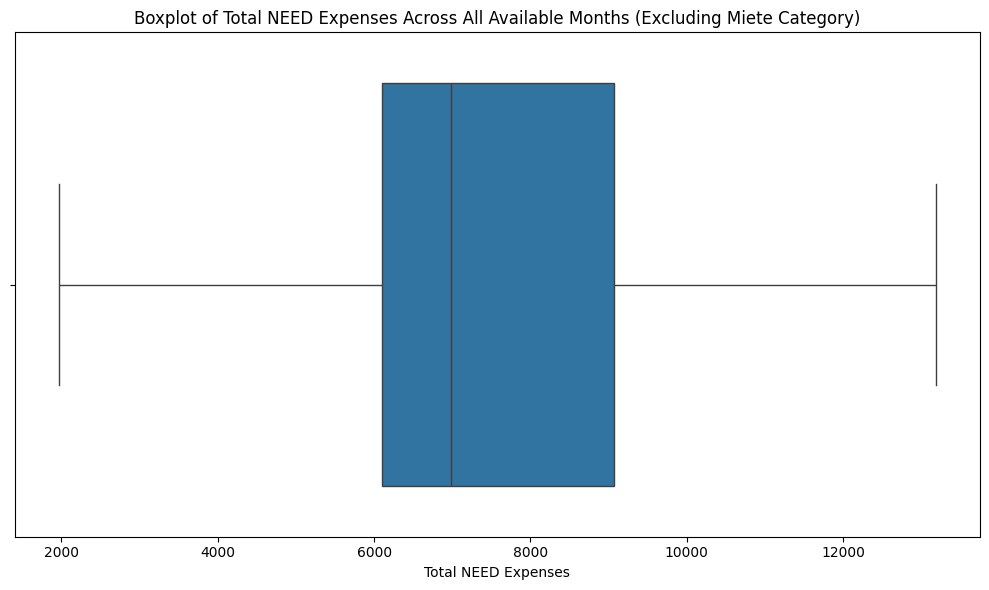

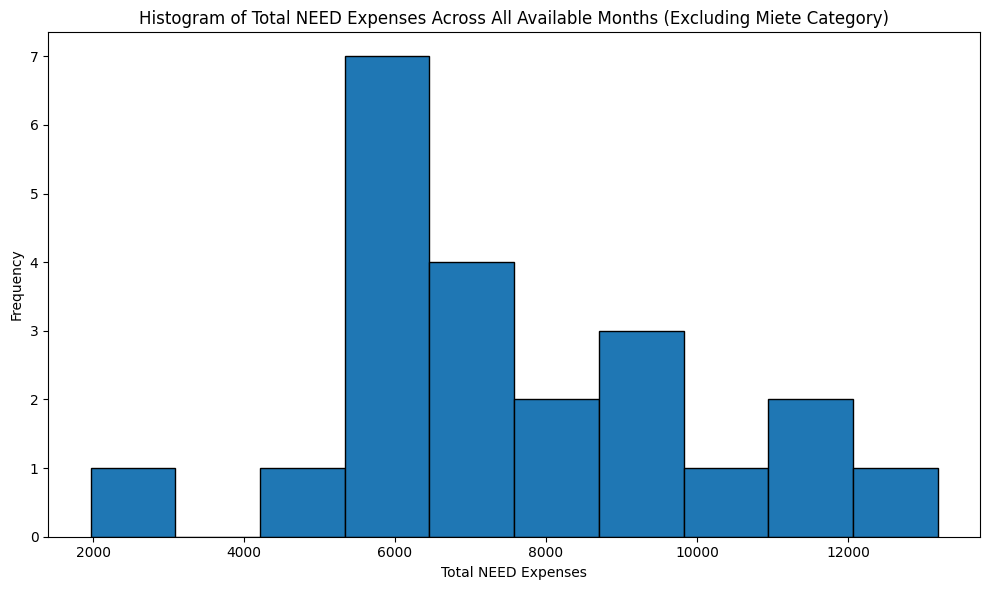

p10: 5627.812999999999
p60 : 7550.9839999999995
p90: 11667.942000000005


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the DataFrame based on conditions
filtered_expenses_df = expenses_df[
    (expenses_df['Date'] >= start_date) & 
    (expenses_df['Date'] <= end_date) & 
    (expenses_df['Type'] == 'NEED') & 
    (expenses_df['Category'] != 'Miete')
]

# Group by 'Month' and calculate the total 'Amount' per month
monthly_totals = filtered_expenses_df.groupby('Month')['Amount'].sum().reset_index()

# Boxplot: Visualize the distribution of the total NEED expenses for all months
plt.figure(figsize=(10, 6))
sns.boxplot(x=monthly_totals['Amount'])

# Optional: Customize the plot title and labels
plt.title('Boxplot of Total NEED Expenses Across All Available Months (Excluding Miete Category)')
plt.xlabel('Total NEED Expenses')

# Show the plot
plt.tight_layout()
plt.show()

# Plotting a histogram for the total NEED expenses across all months
plt.figure(figsize=(10, 6))
plt.hist(monthly_totals['Amount'], bins=10, edgecolor='black')  # You can adjust bins for different granularity

# Optional: Customize the plot title and labels
plt.title('Histogram of Total NEED Expenses Across All Available Months (Excluding Miete Category)')
plt.xlabel('Total NEED Expenses')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

# Calculate p10, p50 (median), and p90 of the monthly totals
p10 = np.percentile(monthly_totals['Amount'], 10)
p60 = np.percentile(monthly_totals['Amount'], 60)
p90 = np.percentile(monthly_totals['Amount'], 90)

# Alternatively, you can use pandas quantile method:
# p10 = monthly_totals['Amount'].quantile(0.10)
# p50 = monthly_totals['Amount'].quantile(0.50)
# p90 = monthly_totals['Amount'].quantile(0.90)

# Print the results
print(f"p10: {p10}")
print(f"p60 : {p60}")
print(f"p90: {p90}")

In [32]:
# Introduce the variable 'monthly_rent'
monthly_rent = 11000  # Replace with the desired monthly rent value


# Add monthly rent to percentiles
p10_with_rent = p10 + monthly_rent
p50_with_rent = p60 + monthly_rent
p90_with_rent = p90 + monthly_rent

# Months for multiplication
months = [3, 4, 5, 6]

# Create a DataFrame with percentiles as the first column and the calculated values for each month
data = {
    'Percentile': ['p10', 'p50', 'p90'],
    '1_months': [p10_with_rent * 1, p50_with_rent * 1, p90_with_rent * 1],
    '3_months': [p10_with_rent * 3, p50_with_rent * 3, p90_with_rent * 3],
    '4_months': [p10_with_rent * 4, p50_with_rent * 4, p90_with_rent * 4],
    '5_months': [p10_with_rent * 5, p50_with_rent * 5, p90_with_rent * 5],
    '6_months': [p10_with_rent * 6, p50_with_rent * 6, p90_with_rent * 6]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


  Percentile   1_months   3_months   4_months    5_months    6_months
0        p10  16627.813  49883.439  66511.252   83139.065   99766.878
1        p50  18550.984  55652.952  74203.936   92754.920  111305.904
2        p90  22667.942  68003.826  90671.768  113339.710  136007.652


In [33]:
df

,Percentile,1_months,3_months,4_months,5_months,6_months
0,p10,16627.813,49883.439,66511.252,83139.065,99766.878
1,p50,18550.984,55652.952,74203.936,92754.920,111305.904
2,p90,22667.942,68003.826,90671.768,113339.710,136007.652
